In [2]:
from segment_anything import SamPredictor, sam_model_registry
sam = sam_model_registry["vit_h"](checkpoint="/data/SAM_pretrained_weights/sam_vit_h_4b8939.pth")

In [3]:
predictor = SamPredictor(sam)

In [34]:
from PIL import Image
import numpy as np
from segment_anything import SamAutomaticMaskGenerator

img = Image.open('/data/DOTA_split/val/images/P0003__512__312___312.jpg')
predictor.set_image(np.asarray(img))
coords = np.asarray([[206, 194],[194,164],[293, 196], [220,226], [286,227], [320,254], [269,281]])
#coords = np.asarray([[269,281]])
label = np.asarray([1,1,1,1,1,1,1])
#label = np.asarray([1])
masks, _, _ = predictor.predict(coords, label)
#mask_generator = SamAutomaticMaskGenerator(sam)
#all_masks = mask_generator.generate(np.asarray(img))

In [90]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.8]])
        img[m] = color_mask
        
    return img

In [91]:
#maskall_img = show_anns(all_masks)

In [7]:
import matplotlib.pyplot as plt 

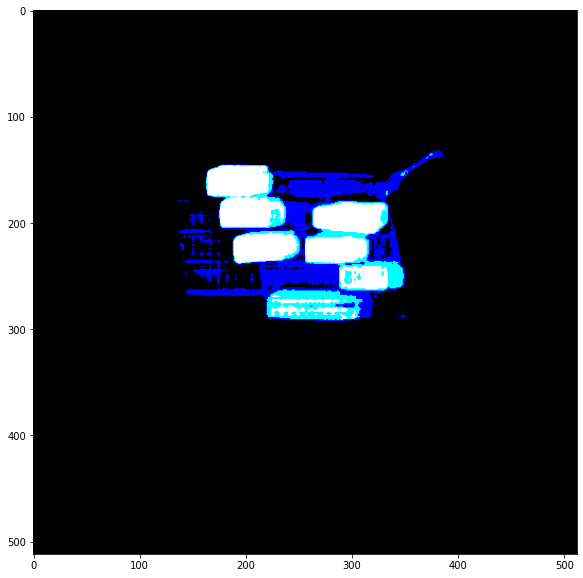

In [35]:
_masks = np.moveaxis(masks, 0, -1)
generated_mask = _masks*255
generated_mask = generated_mask.astype(np.uint8)
np_allmasks = Image.fromarray(generated_mask)
plt.figure(figsize=(10,10))
plt.imshow(generated_mask)
np_allmasks.save('/data/controlnet-1xb1-fill50k_lora/P0003__512__312___312_mask_gt_bboxes_center.png')

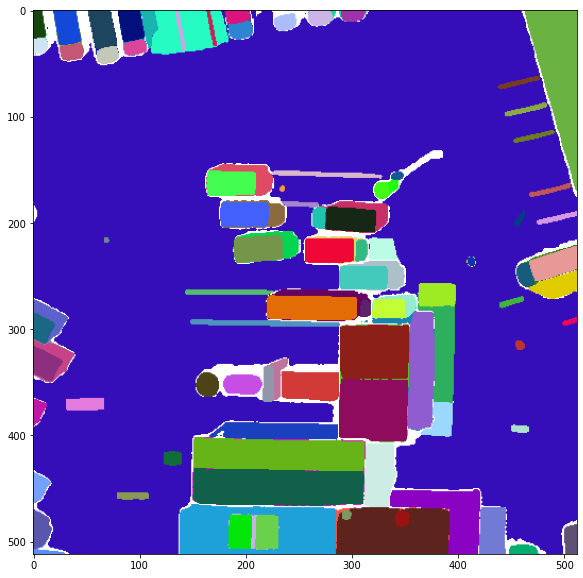

In [94]:
#tmp = (maskall_img[:,:,:-1]*255).astype(np.uint8)

#np_mask = Image.fromarray(tmp)

#plt.figure(figsize=(10,10))
#plt.imshow(np_mask)

In [95]:
#np_mask = Image.fromarray(masked_img)
#np_mask.save('/data/controlnet-1xb1-fill50k_lora/P0003__512__312___312_allthings.png')

In [36]:
import cv2
import numpy as np
import mmcv
from mmengine import Config
from PIL import Image

from mmagic.registry import MODELS
from mmagic.utils import register_all_modules
from mmengine.runner import load_checkpoint

register_all_modules()

#cfg = Config.fromfile('configs/controlnet/controlnet-1xb1-fill50k_lora_inference.py')
#checkpoint_file = '/data/controlnet-1xb1-fill50k_lora/iter_10000.pth'
cfg = Config.fromfile('mmagic/configs/controlnet/controlnet-seg.py')
controlnet = MODELS.build(cfg.model)
#ckpt = load_checkpoint(controlnet, checkpoint_file, map_location='cpu')
controlnet.to('cuda:0')
controlnet.eval()


A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


05/22 08:50:11 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'


/mmagic/mmagic/models/archs/wrapper.py:129: FutureWarning: Accessing config attribute `block_out_channels` directly via 'AutoencoderKL' object attribute is deprecated. Please access 'block_out_channels' over 'AutoencoderKL's config object instead, e.g. 'unet.config.block_out_channels'.
  return getattr(self.model, name)


05/22 08:50:13 - mmengine - INFO - Enable Xformers for HuggingFace Diffusers' module 'vae'.
05/22 08:50:13 - mmengine - INFO - Enable Xformers for HuggingFace Diffusers' module 'unet'.


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/mmagic/mmagic/models/archs/wrapper.py:129: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  return getattr(self.model, name)


ControlStableDiffusion(
  (data_preprocessor): DataPreprocessor()
  (vae): Wrapped Module Class: <class 'diffusers.models.autoencoder_kl.AutoencoderKL'>
  Wrapped Module Name: AutoencoderKL
  From Pretrained: runwayml/stable-diffusion-v1-5
  AutoencoderKL(
    (model): AutoencoderKL(
      (encoder): Encoder(
        (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (down_blocks): ModuleList(
          (0): DownEncoderBlock2D(
            (resnets): ModuleList(
              (0): ResnetBlock2D(
                (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
                (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
                (dropout): Dropout(p=0.0, inplace=False)
                (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                (nonlinearity): SiLU()
              )
              (1): ResnetBlock2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:10<00:00,  4.93it/s]


1


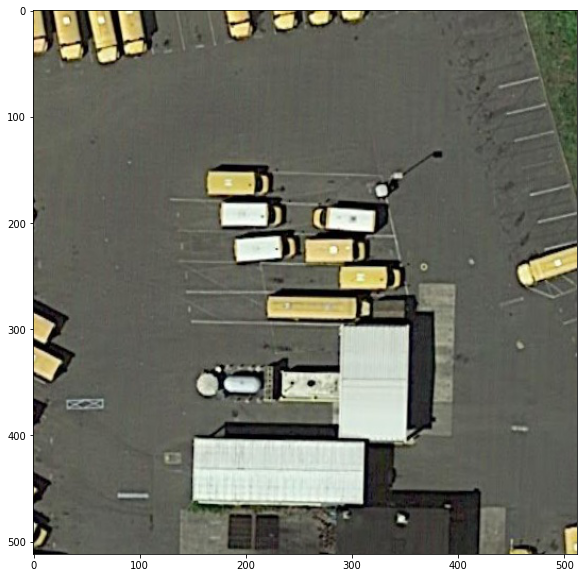

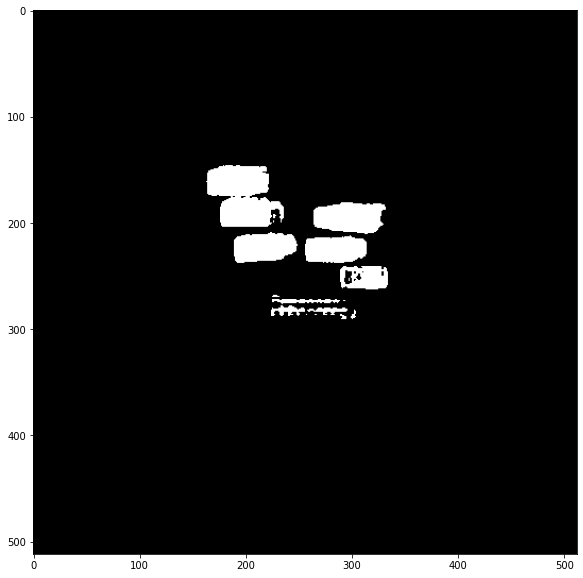

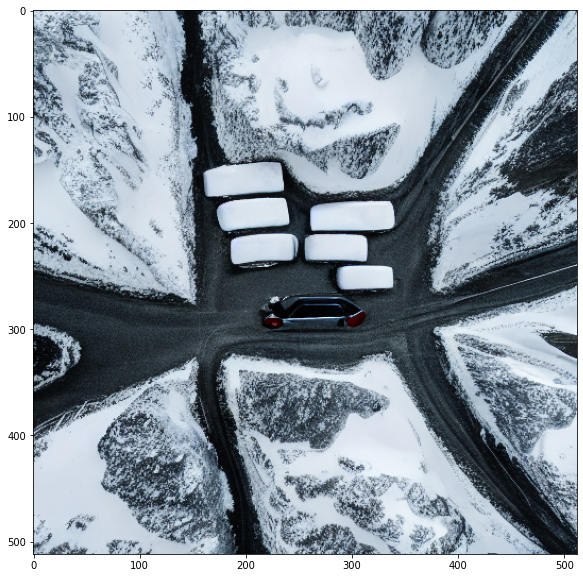

In [54]:
#prompt = 'A top down view of cars in construction zone'
prompt = 'A top down view of snowy cars, in heavy snowy mountain'
#control_url = '/data/controlnet-1xb1-fill50k_lora/P0003__512__312___312_allthings.png'
#control_url = '/data/controlnet-1xb1-fill50k_lora/P0003__512__312___312_mask_bbox_center.png'
#control_url = '/data/controlnet-1xb1-fill50k_lora/P0003__512__312___312_mask_gt_bboxes_center.png'
control_url = '/data/controlnet-1xb1-fill50k_lora/P0003__512__312___312_mask_gt_bboxes_center_all_255.png'
original_url = '/data/DOTA_split/val/images/P0003__512__312___312.jpg'

control = Image.open(control_url)

save_prompt = '_'.join(prompt.split(' '))
output_dict = controlnet.infer(prompt, control=control, num_inference_steps=50, guidance_scale=7.5)
#output_dict = controlnet.infer(prompt, control=control)
sample = output_dict['samples'][0]
print (len(output_dict['samples']))
sample = sample.resize(control.size)
sample.save('/data/controlnet-1xb1-fill50k_lora/'+save_prompt+'_gt_bboxes_center_sample_trained.png')

original = Image.open(original_url)

#composed_img = Image.composite(sample, original, control.convert('L'))

plt.figure(figsize=(10,10))
plt.imshow(original)

plt.figure(figsize=(10,10))
plt.imshow(control)

plt.figure(figsize=(10,10))
plt.imshow(sample)

#plt.figure(figsize=(10,10))
#plt.imshow(composed_img)

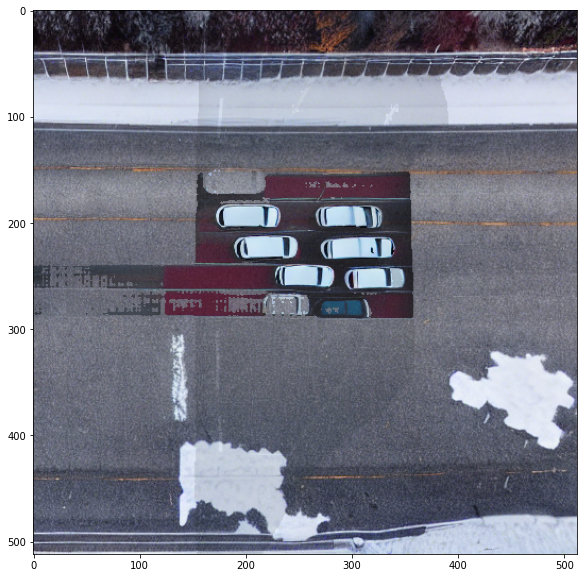

In [25]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 
from segment_anything import SamAutomaticMaskGenerator

new_bg = Image.open('/work/stable-diffusion/outputs/txt2img-samples/samples/00121.png')

new_fg = Image.open('/data/controlnet-1xb1-fill50k_lora/A_top_down_view_of_cars_in_snowy_weather_gt_bboxes_center_sample_trained.png')

predictor.set_image(np.asarray(new_fg))
coords = np.asarray([[190, 190],[220, 220], [250, 250], [290, 190], [300, 220], [320,250]])
#coords = np.asarray([[269,281]])
label = np.asarray([1,1,1,1,1,1])
#label = np.asarray([1])
masks, _, _ = predictor.predict(coords, label)
#mask_generator = SamAutomaticMaskGenerator(sam)
#all_masks = mask_generator.generate(np.asarray(img))
_masks = np.moveaxis(masks, 0, -1)
generated_mask = _masks*255
generated_mask = generated_mask.astype(np.uint8)
np_allmasks = Image.fromarray(generated_mask)
plt.figure(figsize=(10,10))


composed_img = Image.composite(new_fg, new_bg, np_allmasks.convert('L'))

plt.imshow(composed_img)


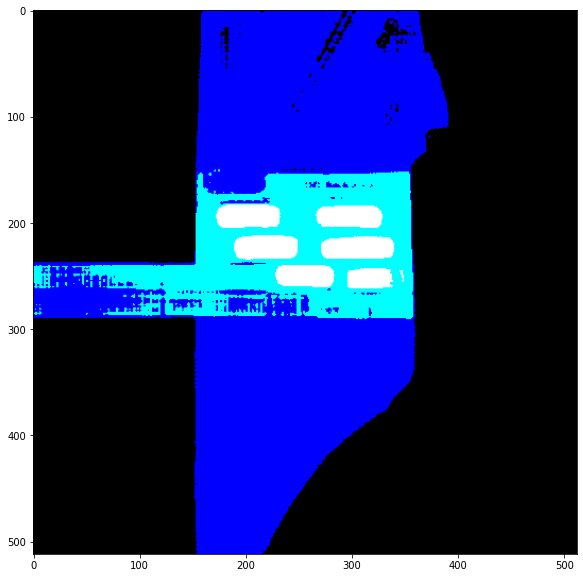

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(np_allmasks)

In [43]:
import numpy as np
import copy
tmp = np.asarray(new_fg)
bg_zeros = np.zeros(tmp.shape, dtype=tmp.dtype)
any_255 = np.all(generated_mask == 255, axis=2)
bg_zeros[any_255] = 255
np_bg_zeros = Image.fromarray(bg_zeros)

np_bg_zeros.save('/data/controlnet-1xb1-fill50k_lora/P0003__512__312___312_mask_gt_bboxes_center_all_255.png')
#composed_img_2 = Image.composite(new_fg, new_bg, (Image.fromarray(bg_zeros)).convert('L'))

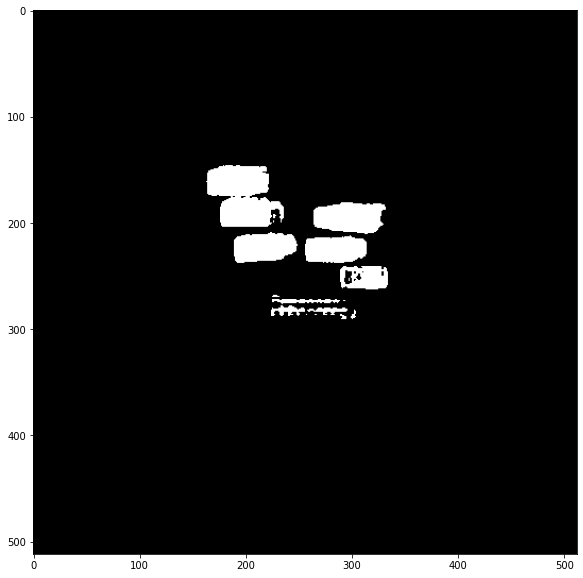

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(bg_zeros)